In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

import random

random.seed(10)

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Sine Wave Building Up

Mean of f  0.0


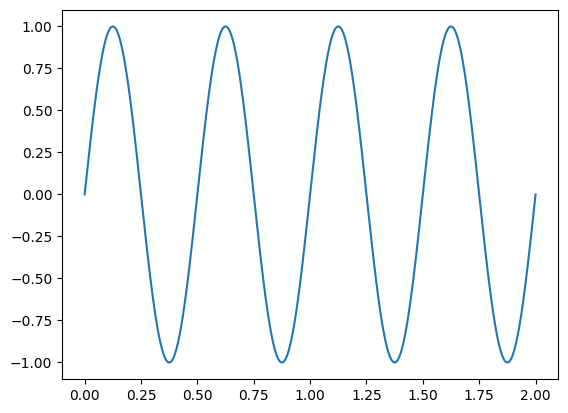

In [3]:
starttime = 0.0
endtime = 2.0
steps = 5000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

## RANDOM RESERVOIR

In [4]:
from ESN import Reservoir
from IPReservoir import IPReservoir 

N = 250

reservoir = Reservoir(N = N, bias = True, ro_rescale = 0.5, bias_range=[-0.5, 0.5])

In [5]:
s =  reservoir.predict(f)

In [6]:
s.shape

torch.Size([5000, 250])

In [7]:
W_x = reservoir.W_x
W_u = reservoir.W_u
b_u = reservoir.b_u
b_x = reservoir.b_x

In [8]:
reservoir.max_eigs()

tensor(0.5000)

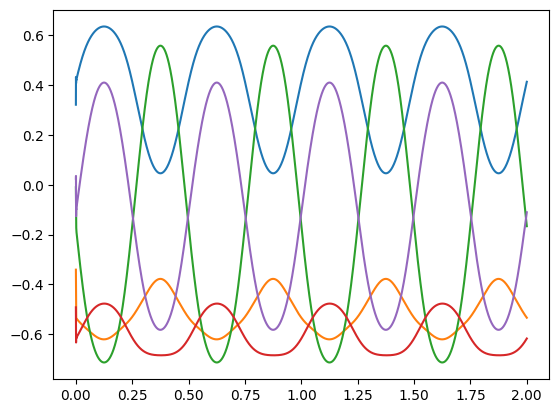

In [9]:
plt.plot(t, s[:, 0:5])

In [10]:
mean_signal = np.mean(reservoir.predict(f).numpy(), axis = 1)

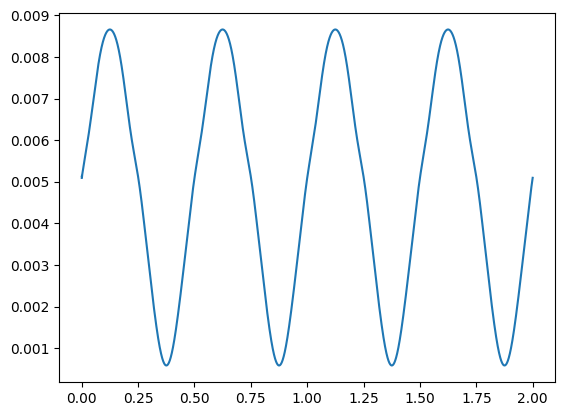

In [11]:
plt.plot(t, mean_signal)

In [12]:
reservoir.LCE(f[0:1000])

-0.9575273

In [13]:
reservoir.de_fi()

0.3793753597776931

## RANDOM RESERVOIR - RESCALING WEIGHTS

In [14]:
reservoir.rescale_weights(0.96)

In [15]:
s =  reservoir.predict(f)

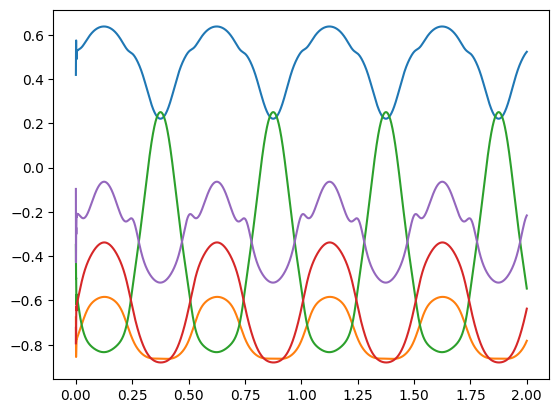

In [16]:
plt.plot(t, s[:, 0:5])

In [17]:
rescaled_mean_signal = np.mean(reservoir.predict(f).numpy(), axis = 1)

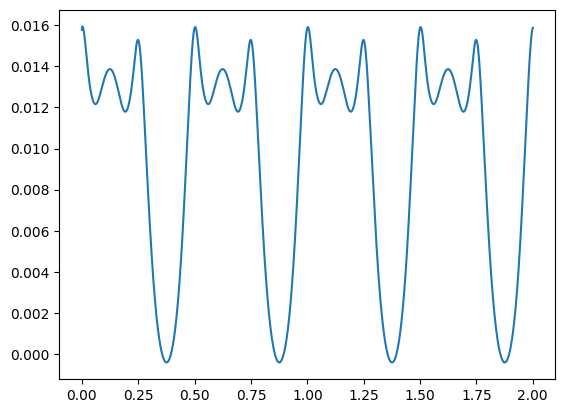

In [18]:
plt.plot(t, rescaled_mean_signal)

In [20]:
reservoir.de_fi()

0.2376372538947388

In [19]:
reservoir.LCE(f[0:1000])

-0.35898924

## UNIMODAL

In [21]:
from IntrinsicPlasticity import IPMask

In [22]:
ip_res = IPReservoir(N=N, bias = True, mask=IPMask.normalMask(N))

In [28]:
ip_res.W_x  = W_x
ip_res.W_u  = W_u 
ip_res.b_u  = b_u 
ip_res.b_x  = b_x 

No transient applied. Reservoir was already warmed up


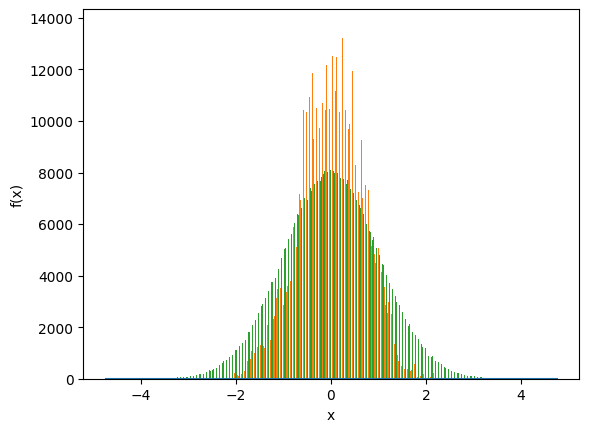

In [29]:
ip_res.pre_train(f, 0, 0)
signals =ip_res.predict(f, save_gradients=False, save_states=True)
ip_res.plot_global_neural_activity()

In [30]:
ip_res.pre_train(eta=0.000025, U=f, epochs=10)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1511.1328125. | Spectral radius: 0.5926635265350342
- Epoch: 2) | KL Divergence value: 1532.7103271484375. | Spectral radius: 0.6328160762786865
- Epoch: 3) | KL Divergence value: 1553.9156494140625. | Spectral radius: 0.6699644327163696
- Epoch: 4) | KL Divergence value: 1574.87060546875. | Spectral radius: 0.7046509385108948
- Epoch: 5) | KL Divergence value: 1595.660888671875. | Spectral radius: 0.7372624278068542
- Epoch: 6) | KL Divergence value: 1616.330810546875. | Spectral radius: 0.768114447593689
- Epoch: 7) | KL Divergence value: 1636.879638671875. | Spectral radius: 0.7974241375923157
- Epoch: 8) | KL Divergence value: 1657.2691650390625. | Spectral radius: 0.8253883123397827
- Epoch: 9) | KL Divergence value: 1677.435302734375. | Spectral radius: 0.8521559238433838
- Epoch: 10) | KL Divergence value: 1697.2999267578125. | Spectral radius: 0.8778377175331116


No transient applied. Reservoir was already warmed up


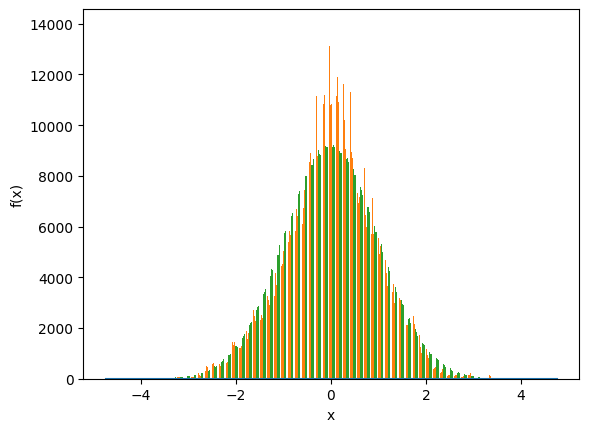

In [39]:
ip_res.pre_train(f, 0, 0)
signals = ip_res.predict(f, save_gradients=False, save_states=True).numpy()
ip_res.plot_global_neural_activity()

In [32]:
ip_mean_sinusoid = np.mean(signals, axis = 1)

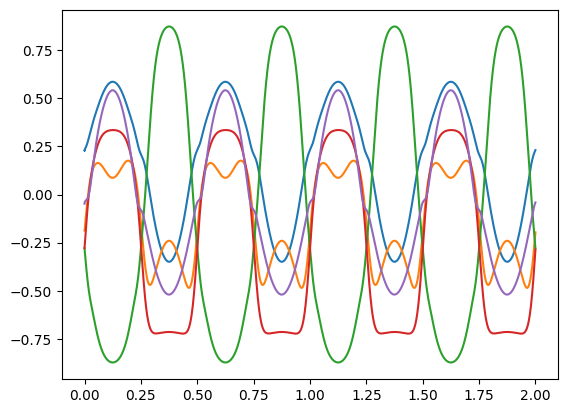

In [33]:
plt.plot(t, ip_res.predict(f).detach()[:, 0:5])

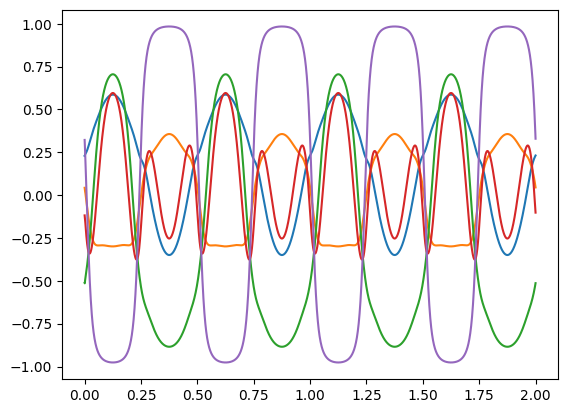

In [34]:
plt.plot(t, ip_res.predict(f).detach()[:,[0,15, 23, 45, 78]])

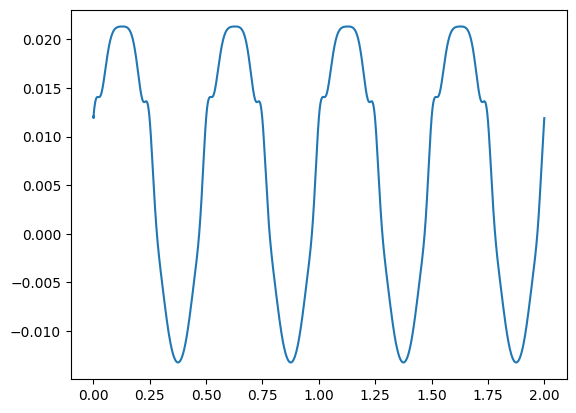

In [35]:
plt.plot(t, ip_mean_sinusoid)

In [36]:
ip_res.de_fi()

0.20620807199372784

In [37]:
ip_res.LCE(f[0:1000])

-0.31599864

In [123]:
ip_res.max_eigs()

tensor(0.8778)

## BIMODAL

In [51]:
bimodal_res = IPReservoir(N=N, mask=IPMask.mixedBimodalMask(N), ro_rescale=0.5, bias=False)

In [52]:
bimodal_res.W_x  = W_x
bimodal_res.W_u  = W_u 
bimodal_res.b_u  = b_u 
bimodal_res.b_x  = b_x 

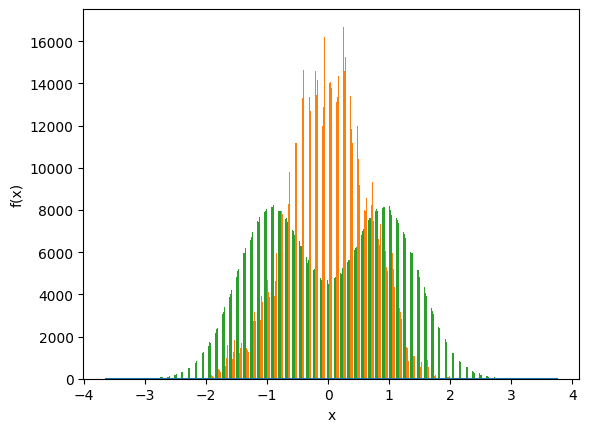

In [47]:
bimodal_res.pre_train(f, 0, 0)
bimodal_res.predict(f, save_gradients=False, save_states=True)
bimodal_res.plot_global_neural_activity()

In [53]:
bimodal_res.pre_train(f, 0.000005, 10)

- Epoch: 1) | KL Divergence value: 2699.48779296875. | Spectral radius: 0.5276874899864197
- Epoch: 2) | KL Divergence value: 2616.1240234375. | Spectral radius: 0.5569929480552673
- Epoch: 3) | KL Divergence value: 2541.240234375. | Spectral radius: 0.5882109999656677
- Epoch: 4) | KL Divergence value: 2474.546630859375. | Spectral radius: 0.6216714382171631
- Epoch: 5) | KL Divergence value: 2415.60400390625. | Spectral radius: 0.6577141284942627
- Epoch: 6) | KL Divergence value: 2363.89990234375. | Spectral radius: 0.6967082023620605
- Epoch: 7) | KL Divergence value: 2318.920166015625. | Spectral radius: 0.7390289306640625
- Epoch: 8) | KL Divergence value: 2280.19921875. | Spectral radius: 0.7850484848022461
- Epoch: 9) | KL Divergence value: 2247.32470703125. | Spectral radius: 0.8351517915725708
- Epoch: 10) | KL Divergence value: 2219.9208984375. | Spectral radius: 0.8897191882133484


In [55]:
bimodal_res.pre_train(f, 0.0000025, 2)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2244.527099609375. | Spectral radius: 0.9193551540374756
- Epoch: 2) | KL Divergence value: 2233.36279296875. | Spectral radius: 0.9502952098846436


In [62]:
bimodal_res.pre_train(f, -0.0000005, 2)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2223.434326171875. | Spectral radius: 0.982577383518219
- Epoch: 2) | KL Divergence value: 2221.595703125. | Spectral radius: 0.9892020225524902


No transient applied. Reservoir was already warmed up


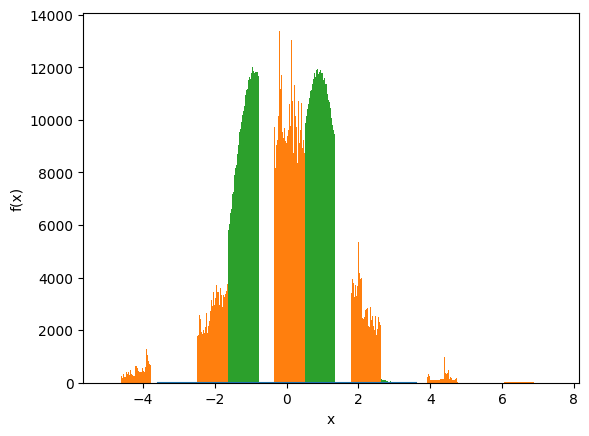

In [63]:
bimodal_res.pre_train(f, 0, 0)
bimodal_res.predict(f, save_gradients=False, save_states=True)
bimodal_res.plot_global_neural_activity()

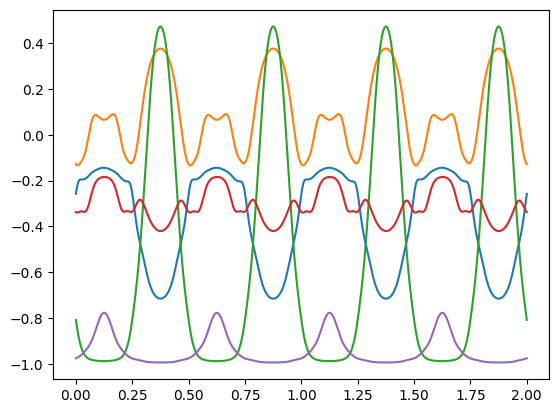

In [64]:
plt.plot(t, bimodal_res.predict(f).detach()[:, 0:5])

In [66]:
bimodal_mean_sinusoid = np.mean(bimodal_res.predict(f).detach().numpy(), axis=1)

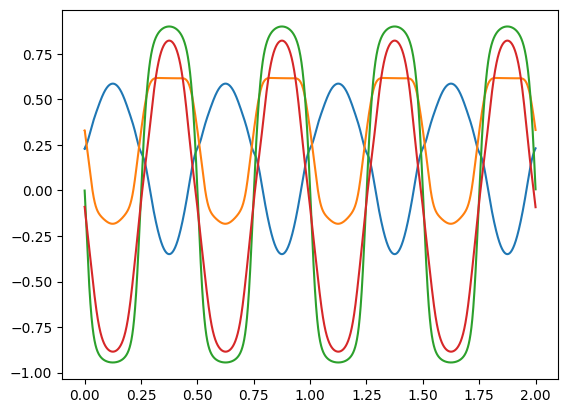

In [67]:
plt.plot(t, ip_res.predict(f).detach()[:, [0, 91, 43, 21]])

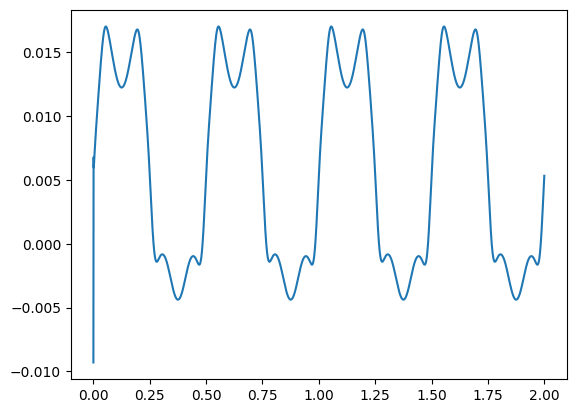

In [68]:
plt.plot(t, bimodal_mean_sinusoid)

In [65]:
bimodal_res.de_fi()

0.4772758115179548

In [69]:
bimodal_res.LCE(f[0:1000])

-0.22748108

In [70]:
bimodal_res.max_eigs()

tensor(0.9892)

## TRIMODAL

In [106]:
trimodal_res = IPReservoir(N=N, ro_rescale=0.5, mask=IPMask.trimodal(N, (1-1/np.pi)), bias=True)

In [107]:
trimodal_res.W_x  = W_x
trimodal_res.W_u  = W_u 
trimodal_res.b_u  = b_u 
trimodal_res.b_x  = b_x 

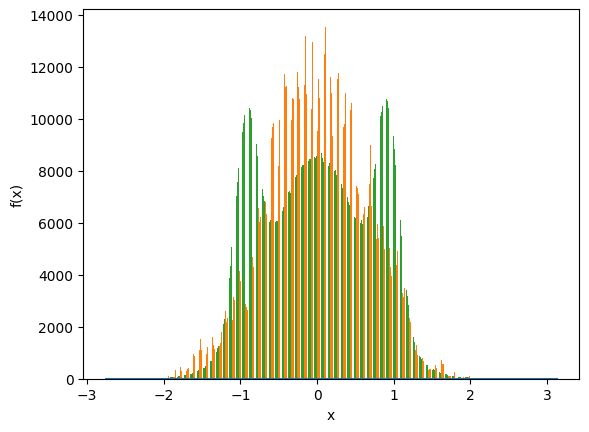

In [98]:
trimodal_res.pre_train(f, 0, 0)
trimodal_res.predict(f, save_gradients=False, save_states=True)
trimodal_res.plot_global_neural_activity()

In [127]:
trimodal_res.pre_train(f, -0.0000005, 5)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1307.2078857421875. | Spectral radius: 0.4963580369949341
- Epoch: 2) | KL Divergence value: 1343.5079345703125. | Spectral radius: 0.4828115701675415
- Epoch: 3) | KL Divergence value: 1384.0382080078125. | Spectral radius: 0.47231030464172363
- Epoch: 4) | KL Divergence value: 1427.346435546875. | Spectral radius: 0.46745872497558594
- Epoch: 5) | KL Divergence value: 1471.73876953125. | Spectral radius: 0.4632219076156616


In [159]:
trimodal_res.pre_train(f, -0.00000025, 1)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1225.7489013671875. | Spectral radius: 0.992759644985199


No transient applied. Reservoir was already warmed up


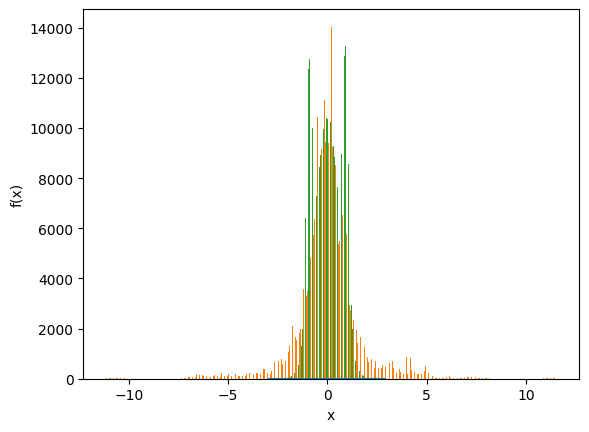

In [160]:
trimodal_res.pre_train(f, 0, 0)
trimodal_res.predict(f, save_gradients=False, save_states=True)
trimodal_res.plot_global_neural_activity()

In [163]:
trimodal_mean_sinusoid = np.mean(trimodal_res.predict(f).detach().numpy(), axis = 1)

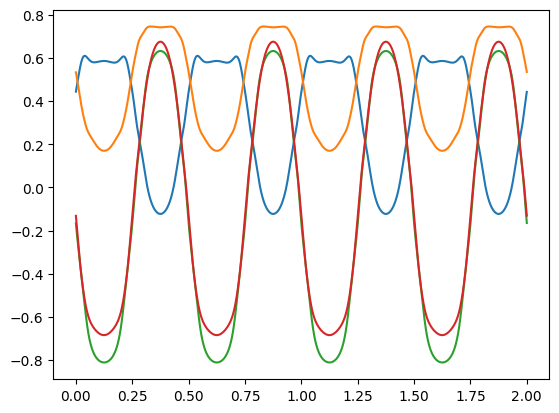

In [164]:
plt.plot(t,  trimodal_res.predict(f).detach()[:,[0, 91, 43, 21]])

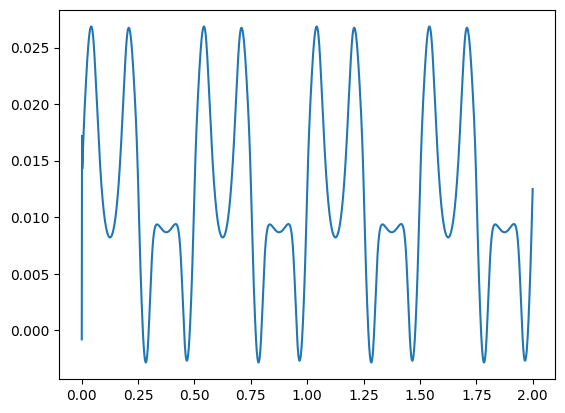

In [165]:
plt.plot(t, trimodal_mean_sinusoid)

In [161]:
trimodal_res.de_fi()

0.6289897913163708

In [162]:
trimodal_res.LCE(f[0:1000])

-0.26180032

## COMPARISON 

Text(0.5, 1.0, 'Output signal averaged over all the recurrent units of each Reservoir')

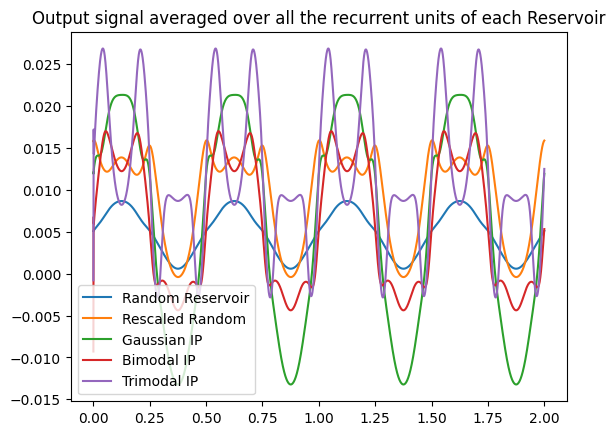

In [167]:
plt.plot(t, mean_signal,t, rescaled_mean_signal, t, ip_mean_sinusoid, t, bimodal_mean_sinusoid,  t, trimodal_mean_sinusoid)
plt.legend(["Random Reservoir", "Rescaled Random", "Gaussian IP", "Bimodal IP", "Trimodal IP"])
plt.title("Output signal averaged over all the recurrent units of each Reservoir")

We can easily notice that the random Reservoir and the Gaussian one are the ones producing the more linear output, in the sense that it follows the shape of the input sine wave basically rescaling it at different orders of magnitude.On the other hand, what the other reservoirs produce is slightly more complex than a sine wave, highlighting the fact that the main control parameter is actually the spectral radius, regulating aspects of the memory-lenght [citare Jaeger e Verstaten-Dambre] and more in general the "closeness" to the bound of the stability (and which has also  been used during the training process as a guard for the stability of the IP optimization process). 